In [1]:
import Pkg; Pkg.instantiate()
Pkg.activate(".")
using DrugResponseModel
using MultistartOptimization

 Activating environment at `~/ODE/DrugResponseModel.jl/Project.toml`
┌ Info: Precompiling DrugResponseModel [f46a7e40-ab32-11e9-0ff4-0323d592fbfd]
└ @ Base loading.jl:1278
ERROR: LoadError: LoadError: LoadError: UndefVarError: @unpack not defined
Stacktrace:
 [1] top-level scope
 [2] include(::Function, ::Module, ::String) at ./Base.jl:380
 [3] include at ./Base.jl:368 [inlined]
 [4] include(::String) at /home/farnazm/ODE/DrugResponseModel.jl/src/DrugResponseModel.jl:2
 [5] top-level scope at /home/farnazm/ODE/DrugResponseModel.jl/src/DrugResponseModel.jl:22
 [6] include(::Function, ::Module, ::String) at ./Base.jl:380
 [7] include(::Module, ::String) at ./Base.jl:368
 [8] top-level scope at none:2
 [9] eval at ./boot.jl:331 [inlined]
 [10] eval(::Expr) at ./client.jl:467
 [11] top-level scope at ./none:3
in expression starting at /home/farnazm/ODE/DrugResponseModel.jl/src/Hill.jl:54
in expression starting at /home/farnazm/ODE/DrugResponseModel.jl/src/Hill.jl:52
in expression starting 

LoadError: Failed to precompile DrugResponseModel [f46a7e40-ab32-11e9-0ff4-0323d592fbfd] to /home/farnazm/.julia/compiled/v1.5/DrugResponseModel/Xqnb6_0dIlI.ji.

In [2]:
using Plots, LinearAlgebra

concs, _, g1s1, g2s1 = load(189, 1);
_, _, g1s2, g2s2 = load(189, 2);
_, _, g1s3, g2s3 = load(189, 3);
g0 = g1s1[1,1,1]+g2s1[1,1,1];
g1m = (g1s1 .+ g1s2 .+ g1s3) ./ 3;
g2m = (g2s1 .+ g2s2 .+ g2s3) ./ 3;

In [3]:
multistart_method = TikTak(100)
low = [minimum(concs[:, 1]), 1e-9, 1e-9, 0.1, 1e-9, 1e-9, 0.0, 0.0, 0.25, 3, 5, 0, 0]
high = [maximum(concs[:, 1]), 1.0, 1.0, 10.0, 1.0, 1.0, 3.0, 3.0, 0.75, 50, 50, 50, 50]

DrugResponseModel.Multistart_Minimization(multistart_method, concs[:, 1], g1m[:, :, 1], g2m[:, :, 1], low, high)

LoadError: MethodError: no method matching local_minimization(::NLopt.Opt, ::MultistartOptimization.MinimizationProblem{DrugResponseModel.var"#f#6"{Array{Float64,1},Array{Float64,2},Array{Float64,2}},Array{Float64,1}}, ::Array{Float64,1})
Closest candidates are:
  local_minimization(!Matched::MultistartOptimization.NLoptLocalMethod, ::MultistartOptimization.MinimizationProblem, ::Any) at /home/farnazm/.julia/packages/MultistartOptimization/Dpf2O/src/MultistartOptimization.jl:110

In [5]:
p = [64.33710201370441, 0.9797001459556969, 1.0e-9, 1.5954556942111737, 0.8528476326442942, 1.0, 0.03660346647841999, 0.055326895290329546, 0.5335657247342455, 23.491232624501976, 27.404890723381346, 32.040707602430786, 19.4132915388461];
pp = DrugResponseModel.getODEparams(p, concs[:, 1])

9×8 Array{Float64,2}:
  0.979689     0.963346     …   0.324284    0.100798    0.0358219
  0.852849     0.855304         0.951292    0.98486     0.994619
  4.0037e-7    0.000611036      0.0244876   0.0328374   0.0352651
  6.05168e-7   0.000923593      0.0370135   0.0496345   0.0533039
  0.533566     0.533566         0.533566    0.533566    0.533566
 23.0         23.0          …  23.0        23.0        23.0
 27.0         27.0             27.0        27.0        27.0
 32.0         32.0             32.0        32.0        32.0
 19.0         19.0             19.0        19.0        19.0

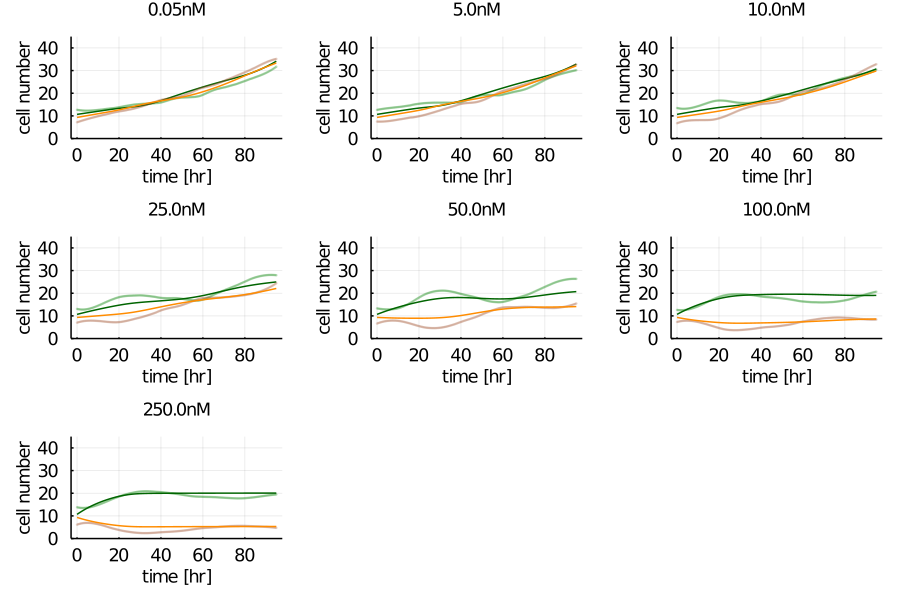

In [6]:
G1 = zeros(189, 8)
G2 = zeros(189, 8)
t = LinRange(0.0, 96, 189)
for i=1:8
    G1[:, i], G2[:, i], _ = predict(pp[:, i], 20.0, t)
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], 1, :false, concs[1, 1])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], i, :false, concs[i, 1]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)